In [1]:
# Importing Libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [7]:
##Step 2. Importing Data
data = pd.read_pickle('/Users/javieraquezada/Desktop/Retail Analysis/02 Data/cleaned_sample.pkl')

In [8]:
data.head(5)

Transaction_ID  Customer_ID             Name                 Email  \
77037          8154457        18745      Tara Wright  Jeffrey100@gmail.com   
106765         8896002        82300    Daniel Patton  Cheyenne19@gmail.com   
187652         1820950        49584  Kathleen Watson     Billy97@gmail.com   
184582         9448636        74580  Steven Sullivan   Gabriel71@gmail.com   
290216         8088692        72061       Heather Yu    Daniel32@gmail.com   

               Phone                          Address        City  \
77037   6.443965e+09          474 Kevin Road Apt. 786     Chicago   
106765  1.792779e+09              717 Timothy Prairie    Brisbane   
187652  2.066960e+09  2069 Nicholas Prairie Suite 877  St. John's   
184582  8.490832e+09                912 Randall Manor   Saskatoon   
290216  7.141601e+09                1297 Willis Drive     Halifax   

                  State  Zipcode    Country  ...  Total_Amount  \
77037       Connecticut  14063.0        USA  ...   2350.802482   
106765  New South Wales  82508.0  Australia  ...    605.991344   
187652          Ontario  61208.0     Canada  ...    676.659578   
184582          Ontario  53361.0     Canada  ...    272.016496   
290216          Ontario  64745.0     Canada  ...   2394.895305   

       Product_Category      Product_Brand Product_Type   Feedback  \
77037             Books      HarperCollins      Fiction  Excellent   
106765         Clothing               Zara        Jeans  Excellent   
187652          Grocery              Pepsi        Water        Bad   
184582       Home Decor  Bed Bath & Beyond      Bedding        Bad   
290216          Grocery             Nestle       Snacks       Good   

        Shipping_Method Payment_Method Order_Status  Ratings  \
77037          Standard         PayPal   Processing      5.0   
106765         Same-Day     Debit Card      Shipped      5.0   
187652         Standard    Credit Card      Shipped      1.0   
184582         Standard    Credit Card      Shipped      1.0   
290216         Standard     Debit Card      Shipped      4.0   

                  products  
77037   Historical fiction  
106765      Wide-leg jeans  
187652       Mineral water  
184582     Mattress topper  
290216               Chips  

[5 rows x 30 columns]

In [9]:
data.shape

(9759, 30)

In [10]:
data.columns

Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')

In [11]:
type(data)

pandas.core.frame.DataFrame

In [13]:
# Converting date to a datetime fromat

##  Converting Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

## 2 Sorting by date just in case
df = df.sort_values('Date')

## 3 Aggregatting: monthly total revenue
monthly_revenue = (
    df.resample('M', on='Date')['Total_Amount']
      .sum()
      .rename('Monthly_Amount')
)

#### 4Quick preview
print(monthly_revenue.head())   # first few months
print(monthly_revenue.tail())   # last few months

Date
2023-03-31    1.177281e+06
2023-04-30    1.121601e+06
2023-05-31    1.173413e+06
2023-06-30    1.011959e+06
2023-07-31    1.163272e+06
Freq: ME, Name: Monthly_Amount, dtype: float64
Date
2023-10-31    1.050960e+06
2023-11-30    1.061515e+06
2023-12-31    1.085936e+06
2024-01-31    1.172070e+06
2024-02-29    1.094335e+06
Freq: ME, Name: Monthly_Amount, dtype: float64


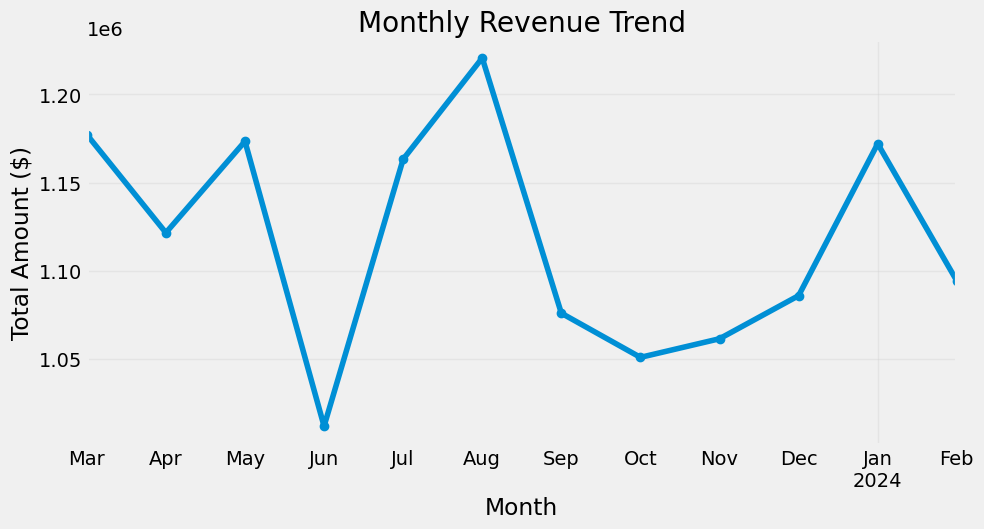

In [14]:
# Line plot the series general view
plt.figure(figsize=(10,5))
monthly_revenue.plot(marker='o')
plt.title('Monthly Revenue Trend')
plt.ylabel('Total Amount ($)')
plt.xlabel('Month')
plt.grid(True, alpha=.3)
plt.show()

In [15]:
import numpy as np
import pandas as pd

def describe_series(ts: pd.Series, name: str = "Series"):
    """
    Prints a quick textual summary of a pandas time-series, including:
      • count, start & end dates
      • mean, min, max (with dates)
      • overall trend direction (simple linear slope sign)
      • month-over-month mean change
    """
    print(f"\n📝  Summary for {name}")
    print("-"*40)
    # Basic stats
    print(f" • Observations  : {ts.count()}")
    print(f" • Date range    : {ts.index.min().date()} → {ts.index.max().date()}")
    print(f" • Mean value    : {ts.mean():,.0f}")
    print(f" • Min  value    : {ts.min():,.0f}  ({ts.idxmin().date()})")
    print(f" • Max  value    : {ts.max():,.0f}  ({ts.idxmax().date()})")
    print(f" • Std deviation : {ts.std():,.0f}")
    
    # Simple linear trend (slope sign)
    x = np.arange(len(ts))
    slope, _ = np.polyfit(x, ts.values, 1)
    trend = "increasing" if slope > 0 else "decreasing" if slope < 0 else "flat"
    print(f" • Overall trend : {trend} (slope ≈ {slope:,.2f} per period)")
    
    # Average month-over-month change
    mom_change = ts.diff().mean()
    print(f" • Avg MoM change: {mom_change:,.0f}\n")

# === Example usage for your monthly revenue series =========
describe_series(monthly_revenue, name="Monthly Revenue")


📝  Summary for Monthly Revenue
----------------------------------------
 • Observations  : 12
 • Date range    : 2023-03-31 → 2024-02-29
 • Mean value    : 1,117,417
 • Min  value    : 1,011,959  (2023-06-30)
 • Max  value    : 1,220,657  (2023-08-31)
 • Std deviation : 63,523
 • Overall trend : decreasing (slope ≈ -4,560.61 per period)
 • Avg MoM change: -7,541



In [19]:
# Creating a subset of data
data = data.sort_index()

In [21]:
print(data.index.name)

Date


In [22]:
# Makeing sure index is datetime and sorted
data.index = pd.to_datetime(data.index)
data = data.sort_index()

start_date = '2023-03-01'
end_date = '2024-02-29'

df_subset = data.loc[start_date:end_date].copy()
print(df_subset.index.min(), "to", df_subset.index.max())

2023-03-01 00:00:00 to 2024-02-29 00:00:00


In [23]:
### Logic behind data dubset selection

#For this analysis, I selected the date range from March 1, 2023, to February 29, 2024. 
#This period reflects the most recent 12 months of complete transaction data, 
#like this we can avoid any partial months or forecasted data that might bias the analysis. 
#This timeframe was chosen to focus on the latest trends and seasonality in customer purchases,
#ensuring relevancy. 
#Any earlier historical events outside this range were excluded to prevent outdated or irrelevant information from influencing
#the time series modeling.

#The 'Date' column was converted to a datetime format and set as the index to facilitate time-based slicing and analysis.

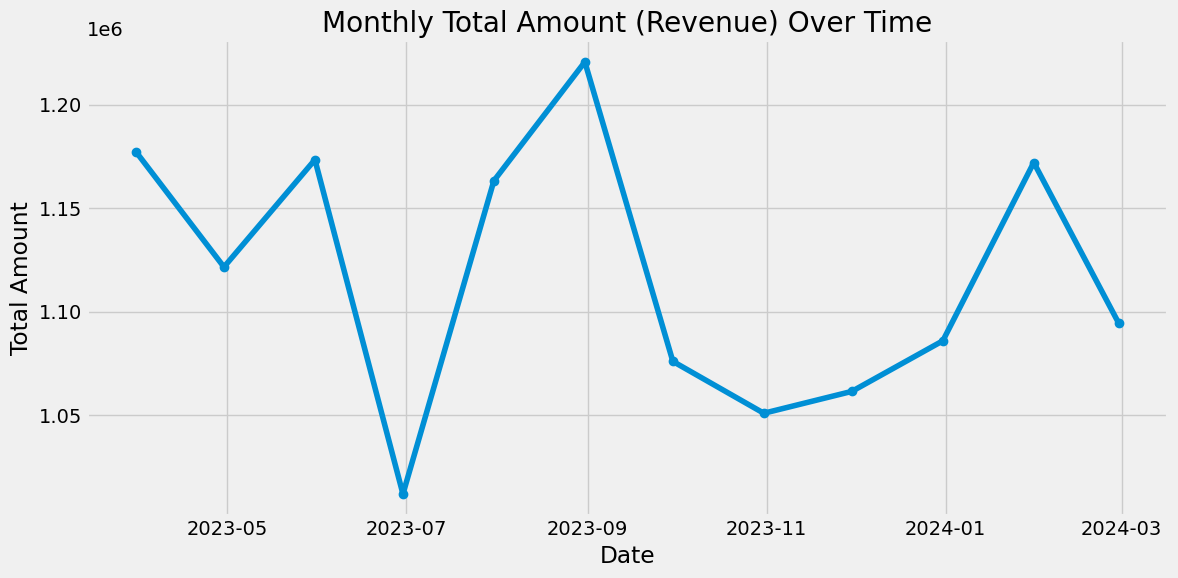

In [24]:
#Step 4.Creating line chart to visualize results of new data frame

# Resample to monthly sums 
monthly_revenue = df_subset['Total_Amount'].resample('M').sum()

plt.figure(figsize=(12,6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-')
plt.title('Monthly Total Amount (Revenue) Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

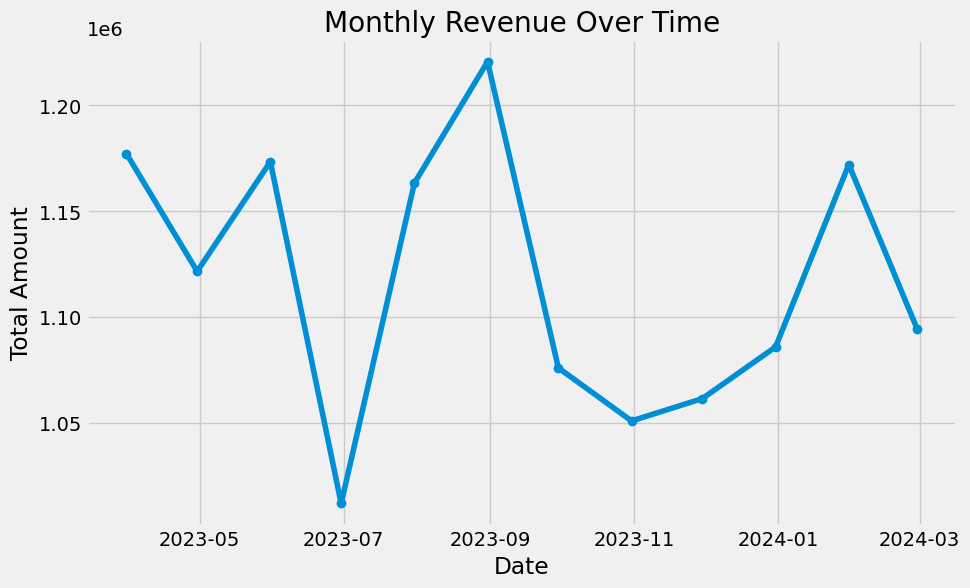

In [25]:
#Saving Viz
plt.figure(figsize=(10,6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)

# Save the figure to your Desktop
save_path = '/Users/javieraquezada/Desktop/Purchases_vs_Amount_by_Cluster.png'
plt.savefig(save_path)

plt.show()

In [32]:
## Step. 5 Decomposing Data components

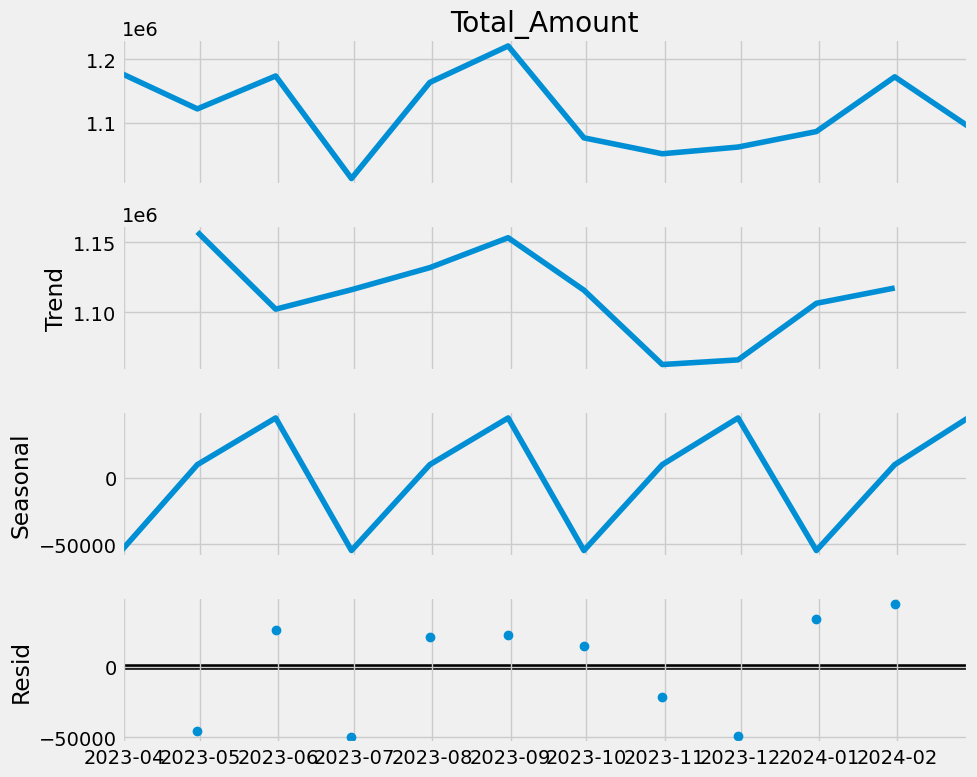

In [33]:
# Decompose the time series in 3 months
decomposition = seasonal_decompose(monthly_revenue, model='additive', period=3)

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.tight_layout()
plt.show()

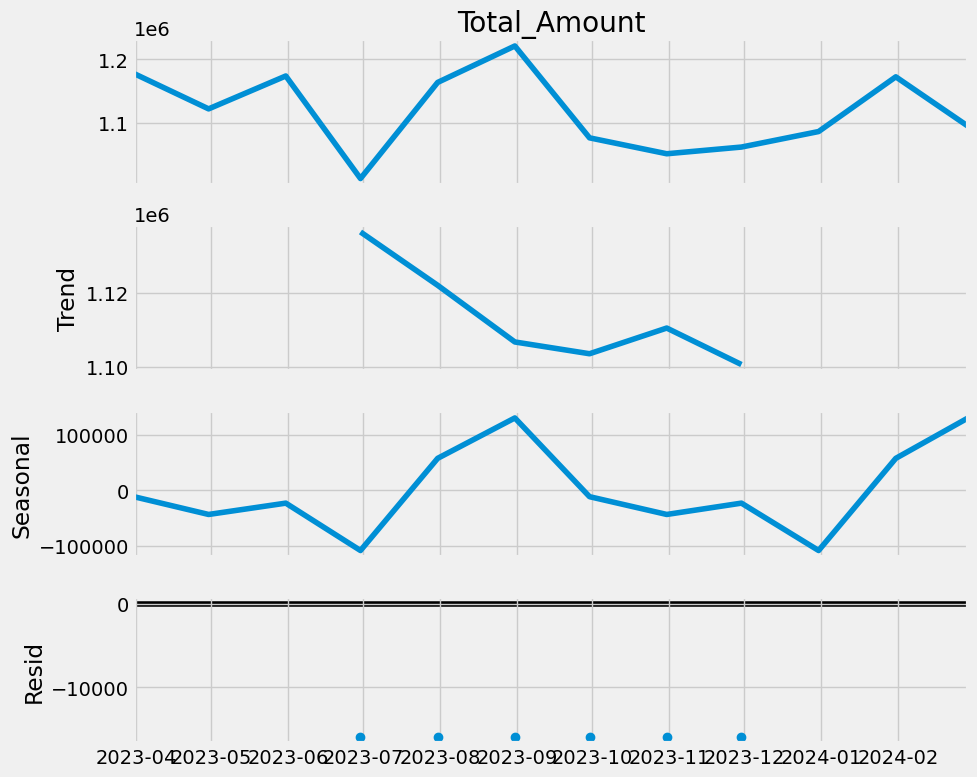

In [35]:
# Decompose the time series in 6 months
decomposition = seasonal_decompose(monthly_revenue, model='additive', period=6)

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.tight_layout()
plt.show()

In [36]:
# Assuming `decomposition` is your result from seasonal_decompose()
# (e.g., with period=3 or 6)

# Print the components
print("Trend Component:\n", decomposition.trend.dropna())
print("\nSeasonal Component:\n", decomposition.seasonal.dropna())
print("\nResidual Component:\n", decomposition.resid.dropna())

Trend Component:
 Date
2023-06-30    1.136257e+06
2023-07-31    1.121930e+06
2023-08-31    1.106719e+06
2023-09-30    1.103559e+06
2023-10-31    1.110457e+06
2023-11-30    1.100663e+06
Freq: ME, Name: trend, dtype: float64

Seasonal Component:
 Date
2023-03-31    -11688.029435
2023-04-30    -43626.647929
2023-05-31    -23277.766049
2023-06-30   -108427.639387
2023-07-31     57211.661396
2023-08-31    129808.421404
2023-09-30    -11688.029435
2023-10-31    -43626.647929
2023-11-30    -23277.766049
2023-12-31   -108427.639387
2024-01-31     57211.661396
2024-02-29    129808.421404
Freq: ME, Name: seasonal, dtype: float64

Residual Component:
 Date
2023-06-30   -15870.201813
2023-07-31   -15870.201813
2023-08-31   -15870.201813
2023-09-30   -15870.201813
2023-10-31   -15870.201813
2023-11-30   -15870.201813
Freq: ME, Name: resid, dtype: float64


In [37]:
#Trend:
#The trend shows a slight decline in monthly revenue between June and November 2023, indicating
#slowdown in customer activity or external factors affecting purchasing behavior during that period.

#Seasonality:
#The seasonality pattern repeats every 6 months, as we used a 6-month decomposition.
#High seasonal boosts were seen in August and February.
#Negative seasonal effects occurred in June and December, possibly indicating holiday slowdowns.

#Residual:
#The residuals were consistently negative and flat, suggesting
#The model fits the data reasonably well.


In [38]:
#Step 6. Conducting Dickey-fuller Test for stationarity
from statsmodels.tsa.stattools import adfuller

# Perform the Dickey-Fuller test
result = adfuller(monthly_revenue.dropna())

# Extract and print results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -0.821434199784944
p-value: 0.8127447157518581
Critical Values:
   1%: -4.9386902332361515
   5%: -3.477582857142857
   10%: -2.8438679591836733


In [39]:
#Test Results:

#Since the p-value (0.81) is much greater than 0.05, we fail to reject the null hypothesis. 
#This suggests that the time series is non-stationary, meaning its statistical properties like mean and variance change over time.
#The ADF statistic is also not less than the critical values, supporting the same conclusion.
# We should apply differencing to the data to try to make it stationary for the next step.

In [40]:
# Step 7. Repeating step 6. due to non stationarity of the data. This time Round Differenciating.
# First differenciating the series
diff_1 = monthly_revenue.diff().dropna()

# Running Dickey-Fuller test again
result_diff_1 = adfuller(diff_1)

print('First Difference ADF Statistic:', result_diff_1[0])
print('First Difference p-value:', result_diff_1[1])
print('Critical Values:')
for key, value in result_diff_1[4].items():
    print(f'   {key}: {value}')

First Difference ADF Statistic: -6.629228420664887
First Difference p-value: 5.771263691935549e-09
Critical Values:
   1%: -4.9386902332361515
   5%: -3.477582857142857
   10%: -2.8438679591836733


In [41]:
# Test Results
#Since the p-value is very small (< 0.05), 
#we reject the null hypothesis and conclude that the first differenced series is stationary.

######No further differencing is necessary.

In [42]:
#Step 9. Checking autocorrelations
plt.figure(figsize=(10,5))
plot_acf(diff_1, lags=24)
plt.title('Autocorrelation Function (ACF) of Differenced Series')
plt.show()

NameError: name 'plot_acf' is not defined

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

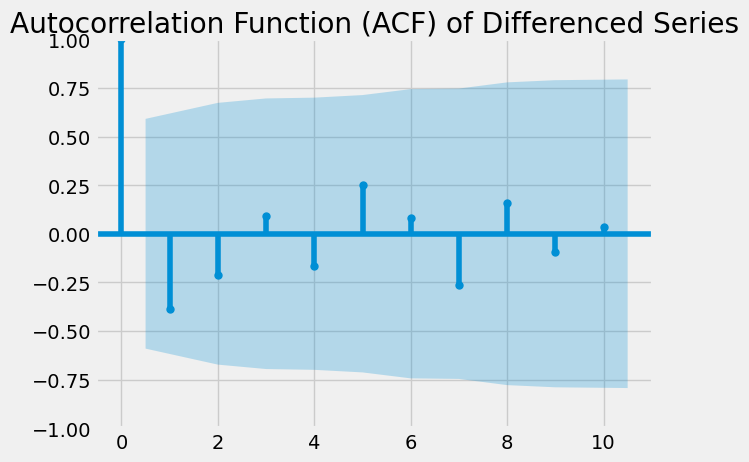

In [46]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

lags_to_use = min(24, len(diff_1) - 1)

plt.figure(figsize=(10,5))
plot_acf(diff_1, lags=lags_to_use)
plt.title('Autocorrelation Function (ACF) of Differenced Series')
plt.show()

In [48]:
from statsmodels.tsa.stattools import acf, pacf

# Get safe lag count based on series length
safe_lags = len(diff_1) // 2

# ACF
acf_vals = acf(diff_1, nlags=safe_lags, fft=False)
print("=== Autocorrelation Values ===")
for lag, val in enumerate(acf_vals):
    print(f"Lag {lag:2}: {val: .4f}")

# PACF
pacf_vals = pacf(diff_1, nlags=safe_lags)
print("\n=== Partial Autocorrelation Values ===")
for lag, val in enumerate(pacf_vals):
    print(f"Lag {lag:2}: {val: .4f}")

=== Autocorrelation Values ===
Lag  0:  1.0000
Lag  1: -0.3860
Lag  2: -0.2111
Lag  3:  0.0903
Lag  4: -0.1636
Lag  5:  0.2530

=== Partial Autocorrelation Values ===
Lag  0:  1.0000
Lag  1: -0.4246
Lag  2: -0.5347
Lag  3: -0.4629
Lag  4: -1.2126
Lag  5:  2.7612


In [54]:
# Ready to build predictive models now.
#Negative autocorrelation.
#Data has bounce back behavior: when the value is high one month, it often drops the next month, and then it might rise again.


<Figure size 1000x500 with 0 Axes>

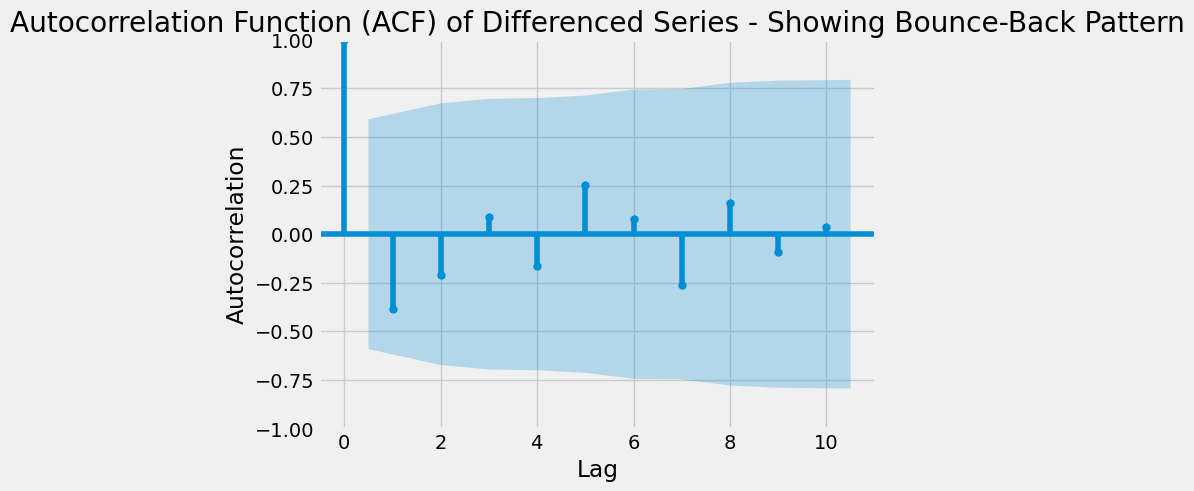

In [55]:
#Saving Viz

plt.figure(figsize=(10,5))
plot_acf(data_diff, lags=min(24, len(data_diff)-1))
plt.title('Autocorrelation Function (ACF) of Differenced Series - Showing Bounce-Back Pattern')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

plt.savefig('/Users/javieraquezada/Desktop/acf_differenced_series.png', dpi=300)

plt.show()